# Sobre o Conjunto de Dados
    
    Dados coletados do IMDB e disponibilizados na plataforma Kaggle, disponível no link: https://www.kaggle.com/datasets/danielgrijalvas/movies?returnUrl=%2Fdatasets%2Fdanielgrijalvas%2Fmovies%2Fversions%2F2%3Fresource%3Ddownload&messageId=unspecified


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv(r'C:\Users\Pc\Desktop\Luis\Análise de Dados\Portfolio Data Analyst\New\Phyton_Projects\MoviesDataset.csv')

In [3]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [4]:
df = df.dropna()

In [5]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
#Corrigindo o Ano

df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [7]:
df['budget'] = df['budget'] .astype('int64')

df['gross'] = df['gross'] .astype('int64')

df['votes'] = df['votes'] .astype('int64')

In [8]:
#Produtoras

pd.set_option('display.max_rows', None)

df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
3698                              Zentropa Entertainments
1180                                 Zenith Entertainment
5180                                      Zazen Produções
1321                             Zanuck/Brown Productions
1329                          Zacharias-Buhai Productions
789                             Young Sung Production Co.
5125                           Young Hannibal Productions
5499                                          Yellow Bird
4618          

In [9]:
pd.set_option('display.max_rows', None)

df = df.sort_values(by=['gross'], inplace=False, ascending=False)

Text(0, 0.5, 'Gross')

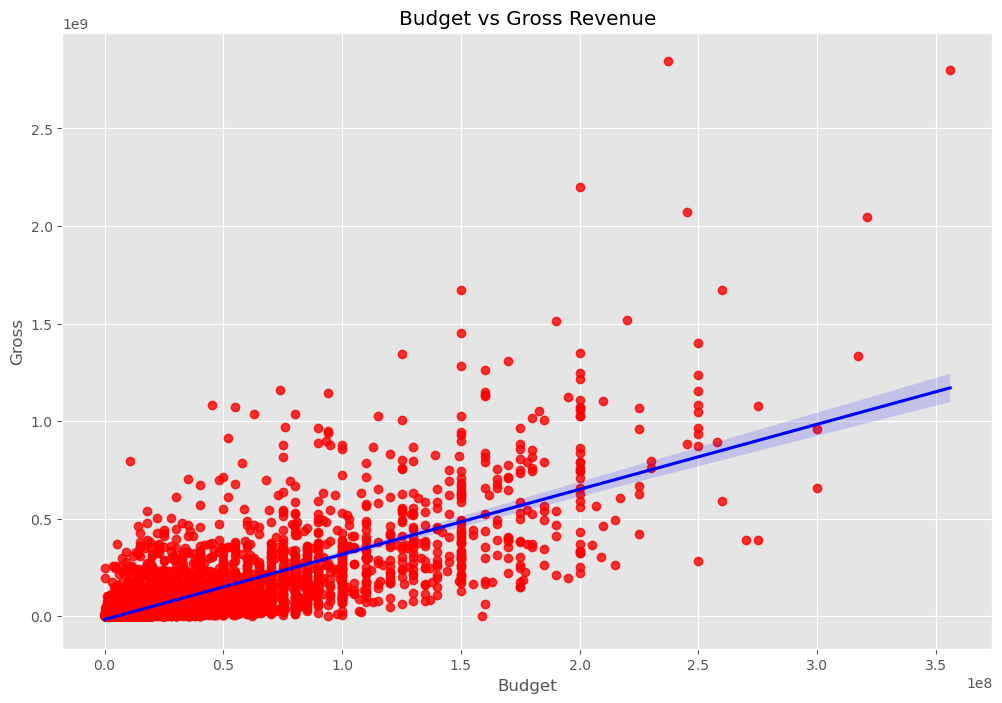

In [11]:
#Scatter Plot mostrando Relação entre Orçamento (Budget) do filme e Arregadação (Gross Revenue)

sns.regplot(x='budget',y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})
plt.title('Budget vs Gross Revenue')
plt.xlabel('Budget')
plt.ylabel('Gross')

In [12]:
#Matriz de Correlação usando Método Pearson

df.corr(method='pearson') 

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
yearcorrect,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

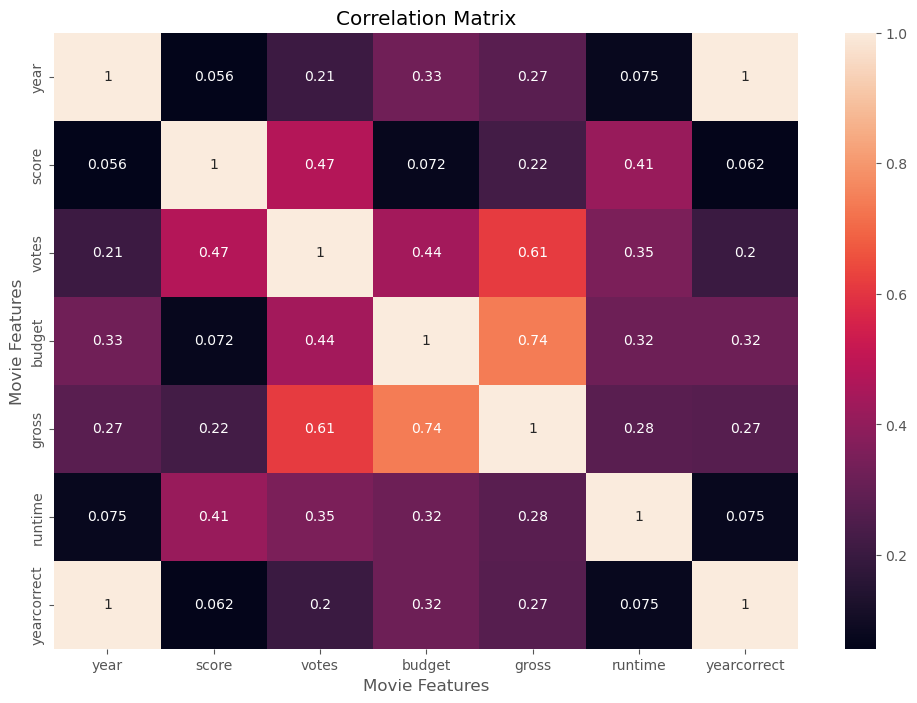

In [13]:
#Correlação com Mapa de Calor(Heat Map)

correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show

In [14]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name         name           1.000000
             rating         0.314800
             genre          0.186668
             year           0.267282
             released       0.667785
             score          0.136453
             votes          0.608411
             director       0.679808
             writer         0.764057
             star           0.599410
             country        0.124405
             budget         0.526690
             gross          0.986431
             company        0.631721
             runtime        0.089567
             yearcorrect    0.262849
rating       name           0.314800
             rating         1.000000
             genre          0.031419
             year           0.096638
             released       0.241253
             score         -0.075109
             votes          0.121122
             director       0.230190
             writer         0.251470
             star           0.226007
             country        0.111309
 

In [15]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

score        rating        -0.075109
rating       score         -0.075109
score        country       -0.057087
country      score         -0.057087
genre        country       -0.055109
country      genre         -0.055109
year         country       -0.047325
country      year          -0.047325
yearcorrect  country       -0.045134
country      yearcorrect   -0.045134
budget       score         -0.005767
score        budget        -0.005767
genre        runtime        0.011329
runtime      genre          0.011329
country      votes          0.013363
votes        country        0.013363
country      runtime        0.020546
runtime      country        0.020546
company      score          0.022732
score        company        0.022732
rating       runtime        0.029208
runtime      rating         0.029208
genre        rating         0.031419
rating       genre          0.031419
yearcorrect  runtime        0.036785
runtime      yearcorrect    0.036785
year         runtime        0.037011
r

In [24]:
#Maiores Correlações (Acima de 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

star         director       0.504992
director     star           0.504992
writer       star           0.510628
star         writer         0.510628
writer       votes          0.522918
votes        writer         0.522918
name         budget         0.526690
budget       name           0.526690
director     company        0.528071
company      director       0.528071
writer       company        0.532013
company      writer         0.532013
budget       gross          0.532810
gross        budget         0.532810
released     writer         0.541155
writer       released       0.541155
name         star           0.599410
star         name           0.599410
votes        name           0.608411
name         votes          0.608411
gross        star           0.612142
star         gross          0.612142
gross        votes          0.620450
votes        gross          0.620450
company      name           0.631721
name         company        0.631721
company      gross          0.637241
g

In [40]:
# Top 15 Estúdios por Arrecadação (Gross Revenue)

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 54610959970
Universal Pictures           51241105418
Columbia Pictures            42356430218
Paramount Pictures           40021704691
Twentieth Century Fox        39542573303
Walt Disney Pictures         35833650748
New Line Cinema              19612851164
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Dreamworks Pictures          11593807697
Touchstone Pictures          10664679494
Metro-Goldwyn-Mayer (MGM)     8937010092
Summit Entertainment          8318570396
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7243673721
Name: gross, dtype: int64

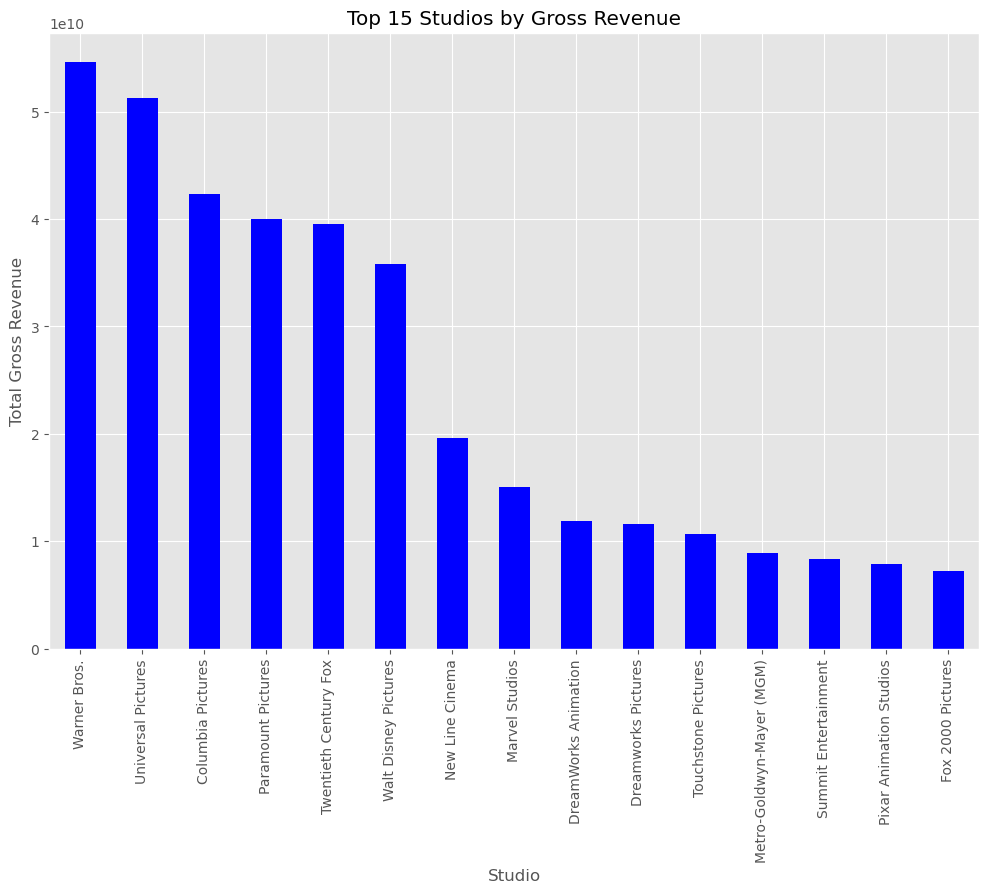

In [42]:
CompanyGrossSumSorted.plot(kind='bar', figsize=(12,8), color='blue')

plt.ylabel('Total Gross Revenue')
plt.xlabel('Studio')
plt.title('Top 15 Studios by Gross Revenue')

plt.show()

In [30]:
#Estudio com maior arrecadação anual, nos últimos 15 anos

CompanyGrossSumY = df.groupby(['company', 'year'])[["gross"]].sum()

CompanyGrossSumSortedY = CompanyGrossSumY.sort_values(['gross','company','year'], ascending = False)[:15]

CompanyGrossSumSortedY = CompanyGrossSumSortedY['gross'].astype('int64') 

CompanyGrossSumSortedY

company                year
Walt Disney Pictures   2019    5773131804
Marvel Studios         2018    4018631866
Universal Pictures     2015    3834354888
Twentieth Century Fox  2009    3793491246
Walt Disney Pictures   2017    3789382071
Paramount Pictures     2011    3565705182
Warner Bros.           2011    3223799224
Walt Disney Pictures   2010    3104474158
Paramount Pictures     2014    3071298586
Columbia Pictures      2006    2934631933
                       2019    2932757449
Marvel Studios         2019    2797501328
Warner Bros.           2018    2774168962
Columbia Pictures      2011    2738363306
Warner Bros.           2005    2688767210
Name: gross, dtype: int64

In [22]:
#Fatorização

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,0.314800,0.186668,0.267282,0.667785,0.136453,0.608411,0.679808,0.764057,0.599410,0.124405,0.526690,0.986431,0.631721,0.089567,0.262849
rating,0.314800,1.000000,0.031419,0.096638,0.241253,-0.075109,0.121122,0.230190,0.251470,0.226007,0.111309,0.283770,0.319778,0.269792,0.029208,0.087261
genre,0.186668,0.031419,1.000000,0.075279,0.115079,0.047421,0.177836,0.131437,0.129595,0.143735,-0.055109,0.175071,0.185075,0.080643,0.011329,0.071750
year,0.267282,0.096638,0.075279,1.000000,0.359792,0.045163,0.286895,0.186504,0.231664,0.240670,-0.047325,0.190333,0.277721,0.136096,0.037011,0.949995
released,0.667785,0.241253,0.115079,0.359792,1.000000,0.099608,0.481682,0.478950,0.541155,0.439566,0.095519,0.396934,0.677897,0.410407,0.058183,0.358544
score,0.136453,-0.075109,0.047421,0.045163,0.099608,1.000000,0.247863,0.176116,0.122357,0.139126,-0.057087,-0.005767,0.139819,0.022732,0.057866,0.053108
votes,0.608411,0.121122,0.177836,0.286895,0.481682,0.247863,1.000000,0.472671,0.522918,0.429085,0.013363,0.317842,0.620450,0.346864,0.088525,0.287857
director,0.679808,0.230190,0.131437,0.186504,0.478950,0.176116,0.472671,1.000000,0.642875,0.504992,0.123672,0.443150,0.692902,0.528071,0.084943,0.190556
writer,0.764057,0.251470,0.129595,0.231664,0.541155,0.122357,0.522918,0.642875,1.000000,0.510628,0.138299,0.449523,0.776528,0.532013,0.066645,0.230543
star,0.599410,0.226007,0.143735,0.240670,0.439566,0.139126,0.429085,0.504992,0.510628,1.000000,0.106459,0.457442,0.612142,0.455443,0.096652,0.242124


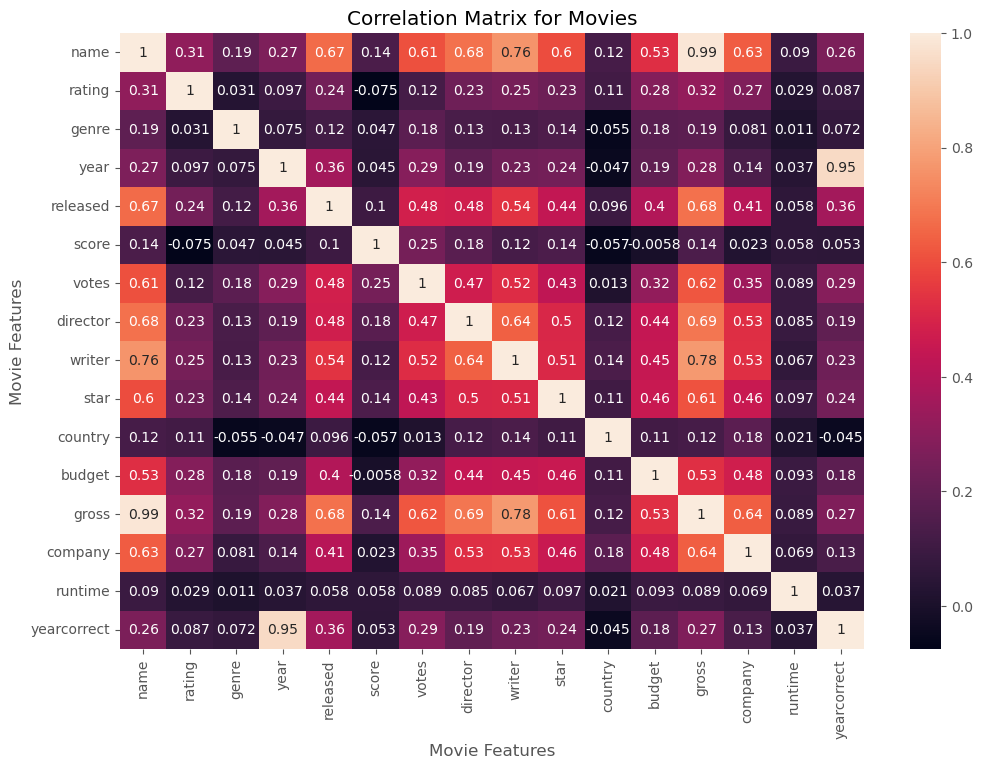

In [23]:
#Matriz de Correlação Completa

correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation Matrix for Movies")

plt.xlabel("Movie Features")

plt.ylabel("Movie Features")

plt.show()

Text(0, 0.5, 'Gross Revenue')

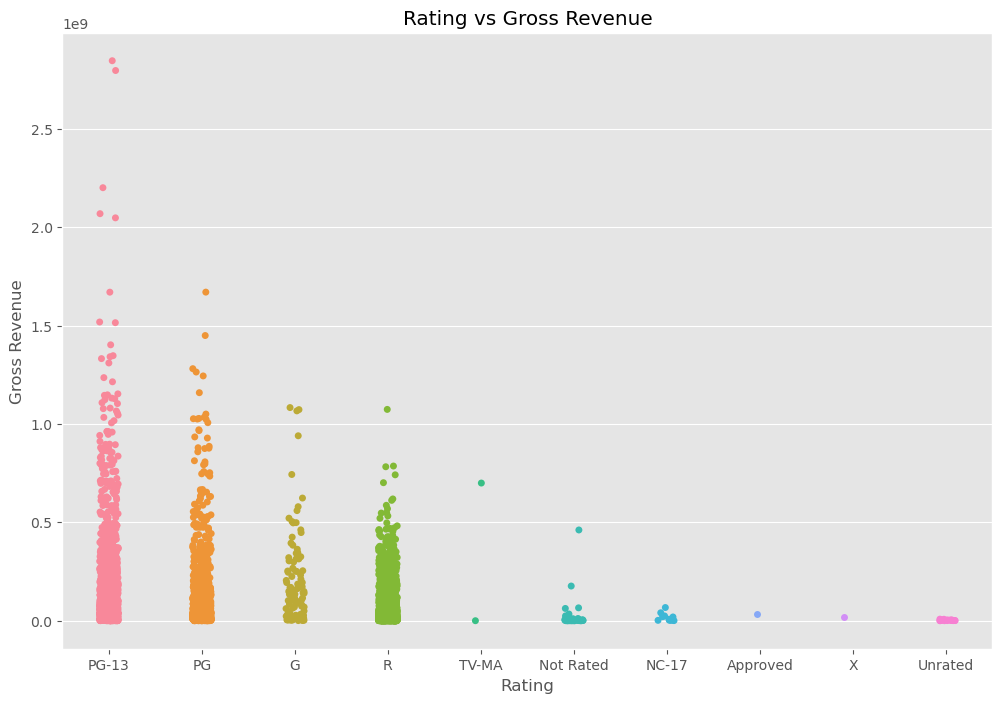

In [25]:
#Strip Plot relacionando Classificação Indicativa(Rating) e Arrecadação (Gross)

ax=sns.stripplot(x="rating", y="gross", data=df)

plt.title("Rating vs Gross Revenue")
plt.xlabel("Rating")
plt.ylabel("Gross Revenue")

